In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
n = 1000
k = 4
pi1, pi2, pi3, pi4 = 0.04, 0.30, 0.30, 0.36
mu1, mu2, mu3, mu4 = np.array([0, 0]), np.array([0, 5]), np.array([5, 0]), np.array([5, 5])
sigma1, sigma2, sigma3, sigma4 = np.array([0.4, 0.4])**0.5, np.array([2, 2])**0.5, np.array([2, 2])**0.5, np.array([2, 2])**0.5

x1 = np.zeros((n, 2))
x2 = np.zeros((n, 2))
x3 = np.zeros((n, 2))
x4 = np.zeros((n, 2))
x1[:,0] = np.random.normal(mu1[0], sigma1[0], n)
x1[:,1] = np.random.normal(mu1[1], sigma1[1], n)
x2[:,0] = np.random.normal(mu2[0], sigma2[0], n)
x2[:,1] = np.random.normal(mu2[1], sigma2[1], n)
x3[:,0] = np.random.normal(mu3[0], sigma3[0], n)
x3[:,1] = np.random.normal(mu3[1], sigma3[1], n)
x4[:,0] = np.random.normal(mu4[0], sigma4[0], n)
x4[:,1] = np.random.normal(mu4[1], sigma4[1], n)

p = pi1*x1 + pi2*x2 + pi3*x3 + pi4*x4

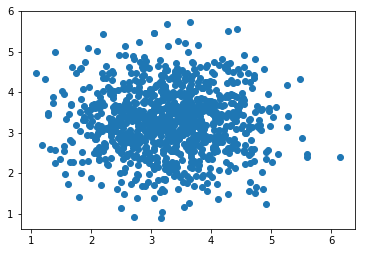

In [14]:
plt.scatter(p[:,0], p[:,1])
plt.show()

In [15]:
# Problem1.1

In [16]:
def k_means(n, p):
    # record cluster number
    cluster_recor = np.zeros(n)

    # random guess mu from data
    IDs = np.arange(n)
    np.random.shuffle(IDs)
    random_guess = IDs[:4]
    #mu1_guess = np.array([np.random.uniform(min(p[:][0]), max(p[:][0])), np.random.uniform(min(p[:][0]), max(p[:][0]))]) #p[random_guess[0],:]
    #mu2_guess = np.array([np.random.uniform(min(p[:][0]), max(p[:][0])), np.random.uniform(min(p[:][0]), max(p[:][0]))]) #p[random_guess[1],:]
    #mu3_guess = np.array([np.random.uniform(min(p[:][0]), max(p[:][0])), np.random.uniform(min(p[:][0]), max(p[:][0]))]) #p[random_guess[2],:]
    #mu4_guess = np.array([np.random.uniform(min(p[:][0]), max(p[:][0])), np.random.uniform(min(p[:][0]), max(p[:][0]))]) #p[random_guess[3],:]
    
    mu1_guess = p[random_guess[0],:]
    mu2_guess = p[random_guess[1],:]
    mu3_guess = p[random_guess[2],:]
    mu4_guess = p[random_guess[3],:]
    
    #mu1_guess = np.random.normal(0, 6, 2)
    #mu2_guess = np.random.normal(0, 6, 2)
    #mu3_guess = np.random.normal(0, 6, 2)
    #mu4_guess = np.random.normal(0, 6, 2)
    
    mu = np.array([mu1_guess, mu2_guess, mu3_guess, mu4_guess])
    mu_prev = np.array([mu1_guess, mu2_guess, mu3_guess, mu4_guess])

    it = 0
    while True:
        for k in range(4):
            mu_prev[k] = mu[k]
        count = np.zeros(4)
        for i in range(n):
            min_id = 0
            min_dist = 1000000
            for j in range(4):
                dist = ((p[i][0] - mu[j][0])**2 + (p[i][1] - mu[j][1])**2)**0.5
                if dist < min_dist:
                    min_id = j
                    min_dist = dist
            cluster_recor[i] = int(min_id)
            count[min_id] += 1
            mu[min_id] = (mu[min_id] * count[min_id] + p[i]) / (count[min_id]+1)

        it += 1
        if np.abs(sum(sum(mu - mu_prev))) < 1e-04: break
    #print('iteration: ',it)
    
    # compute objective function J
    J = 0
    for i in range(n):
        l = int(cluster_recor[i])
        J += ((p[i][0] - mu[l][0])**2 + (p[i][1] - mu[l][1])**2)**0.5
    print('J_kmeans = ',J)
    
    return J, cluster_recor, mu

J_kmeans =  602.6579185314703


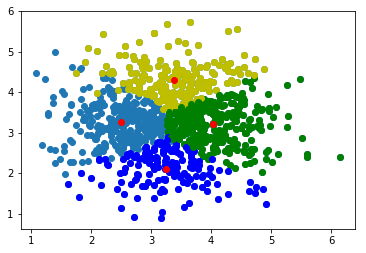

In [17]:
[J, cluster_recor, mu] = k_means(n, p)
plt.scatter(p[:,0], p[:,1])
for i in range(n):
    if cluster_recor[i] == 0:
        plt.plot(p[i][0], p[i][1], 'bo')
    elif cluster_recor[i] == 1:
        plt.plot(p[i][0], p[i][1], 'yo')
    elif cluster_recor[i] == 2:
        plt.plot(p[i][0], p[i][1], 'go')
plt.plot(mu[:,0], mu[:,1], 'ro')
plt.show()

In [18]:
J = np.zeros(20)
for i in range(20):
    [J[i], cluster_recor, mu] = k_means(n, p)

mean_J = np.mean(J)
std_J = np.std(J)
print('mean of J: ', mean_J)
print('std of J: ', std_J)

J_kmeans =  602.6579150916128
J_kmeans =  609.9178278341149
J_kmeans =  602.65791853099
J_kmeans =  602.6579185313376
J_kmeans =  602.6579185753905
J_kmeans =  602.657918530731
J_kmeans =  602.6579185316639
J_kmeans =  602.657918530731
J_kmeans =  602.657918536927
J_kmeans =  602.6579150915813
J_kmeans =  602.6579150914138
J_kmeans =  602.6579185455561
J_kmeans =  602.6579183077408
J_kmeans =  602.6579185584762
J_kmeans =  602.6579150915211
J_kmeans =  602.657918530731
J_kmeans =  602.6579185308448
J_kmeans =  602.65791859222
J_kmeans =  602.6579149760655
J_kmeans =  602.657918581614
mean of J:  603.0209131295632
std of J:  1.5822607483880964


In [19]:
# Problem1.2

In [20]:
def k_means_pp(n, p):
    # record cluster number
    cluster_recor = np.zeros(n)
    
    # determine mu
    mu = np.zeros((4,2))
    mu[0] = p[np.random.randint(n)]
    d = np.zeros(n)

    for i in range(1, 4):
        for j in range(n):
            min_dist = 1000000
            for k in range(i):
                dist = (p[j][0] - mu[k][0])**2 + (p[j][1] - mu[k][1])**2
                if dist < min_dist:
                    min_dist = dist

            d[j] = min_dist
        pi = d / sum(d)
        custm = stats.rv_discrete(name='custm', values=(np.arange(n), pi))
        id_next = int(custm.rvs(size=1))
        mu[i][0] = p[id_next][0]
        mu[i][1] = p[id_next][1]
    mu_prev = np.zeros((4,2))

    it = 0
    while True:
        for k in range(4):
            mu_prev[k] = mu[k]
        count = np.zeros(4)
        for i in range(n):
            min_id = 0
            min_dist = 1000000
            for j in range(4):
                dist = ((p[i][0] - mu[j][0])**2 + (p[i][1] - mu[j][1])**2)**0.5
                if dist < min_dist:
                    min_id = j
                    min_dist = dist
            cluster_recor[i] = int(min_id)
            count[min_id] += 1
            mu[min_id] = (mu[min_id] * count[min_id] + p[i]) / (count[min_id]+1)

        it += 1
        if np.abs(sum(sum(mu - mu_prev))) < 1e-04: break
    #print('iteration: ',it)
    
    # compute objective function J
    J = 0
    for i in range(n):
        l = int(cluster_recor[i])
        J += ((p[i][0] - mu[l][0])**2 + (p[i][1] - mu[l][1])**2)**0.5
    print('J_kmeans_pp = ',J)
    
    return J, cluster_recor, mu

J_kmeans_pp =  602.6579185369087


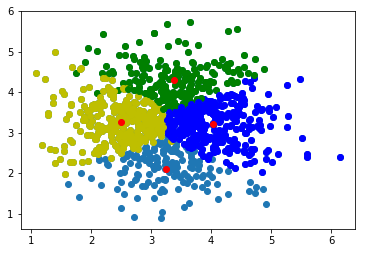

In [21]:
[J, cluster_recor, mu] = k_means_pp(n, p)
plt.scatter(p[:,0], p[:,1])
for i in range(n):
    if cluster_recor[i] == 0:
        plt.plot(p[i][0], p[i][1], 'bo')
    elif cluster_recor[i] == 1:
        plt.plot(p[i][0], p[i][1], 'yo')
    elif cluster_recor[i] == 2:
        plt.plot(p[i][0], p[i][1], 'go')
plt.plot(mu[:,0], mu[:,1], 'ro')
plt.show()

In [22]:
J = np.zeros(20)
for i in range(20):
    [J[i], cluster_recor, mu] = k_means_pp(n, p)

mean_J = np.mean(J)
std_J = np.std(J)
print('mean of J: ', mean_J)
print('std of J: ', std_J)

J_kmeans_pp =  602.657919026844
J_kmeans_pp =  602.4836158022929
J_kmeans_pp =  602.6579185816548
J_kmeans_pp =  602.6579185756625
J_kmeans_pp =  602.6579178671944
J_kmeans_pp =  602.6579201526032
J_kmeans_pp =  602.6579185358443
J_kmeans_pp =  602.6579150915703
J_kmeans_pp =  602.6579191115347
J_kmeans_pp =  602.6579149045568
J_kmeans_pp =  602.6579185388836
J_kmeans_pp =  602.4836160979938
J_kmeans_pp =  602.6579185427044
J_kmeans_pp =  602.6579185308534
J_kmeans_pp =  602.6579178801645
J_kmeans_pp =  602.6579184771305
J_kmeans_pp =  602.65791108966
J_kmeans_pp =  602.657918530731
J_kmeans_pp =  602.6579185425609
J_kmeans_pp =  602.6579150906665
mean of J:  602.6404874485554
std of J:  0.052290499509484736


In [23]:
# Problem1.3

In [24]:
def k_means_pp1(n, p, k_cluster):
    # record cluster number
    cluster_recor = np.zeros(n)
    
    # determine mu
    mu = np.zeros((k_cluster,2))
    mu[0] = p[np.random.randint(n)]
    d = np.zeros(n)

    for i in range(1, k_cluster):
        for j in range(n):
            min_dist = 1000000
            for k in range(i):
                dist = (p[j][0] - mu[k][0])**2 + (p[j][1] - mu[k][1])**2
                if dist < min_dist:
                    min_dist = dist

            d[j] = min_dist
        pi = d / sum(d)
        custm = stats.rv_discrete(name='custm', values=(np.arange(n), pi))
        id_next = int(custm.rvs(size=1))
        mu[i][0] = p[id_next][0]
        mu[i][1] = p[id_next][1]
    mu_prev = np.zeros((k_cluster,2))

    it = 0
    while True:
        for k in range(k_cluster):
            mu_prev[k] = mu[k]
        count = np.zeros(k_cluster)
        for i in range(n):
            min_id = 0
            min_dist = 1000000
            for j in range(k_cluster):
                dist = ((p[i][0] - mu[j][0])**2 + (p[i][1] - mu[j][1])**2)**0.5
                if dist < min_dist:
                    min_id = j
                    min_dist = dist
            cluster_recor[i] = int(min_id)
            count[min_id] += 1
            mu[min_id] = (mu[min_id] * count[min_id] + p[i]) / (count[min_id]+1)

        it += 1
        if np.abs(sum(sum(mu - mu_prev))) < 1e-04: break
    #print('iteration: ',it)
    
    # compute objective function J
    J = 0
    for i in range(n):
        l = int(cluster_recor[i])
        J += ((p[i][0] - mu[l][0])**2 + (p[i][1] - mu[l][1])**2)**0.5
    #print('J_kmeans_pp = ',J)
    
    return J, cluster_recor, mu

In [25]:
k_cluster = 25
J_hat = np.zeros((k_cluster, 20))
for k in range(4, k_cluster):
    for i in range(20):
        [J, cluster_recor, mu] = k_means_pp1(n, p, k)
        J_hat[k-4][i] = J + k * np.log(n)
    #print('J_kmeans_pp = ',J_hat[k-4])


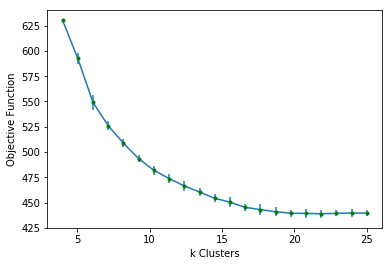

In [26]:
mean_J_hat = np.zeros(k_cluster-4)
std_J_hat = np.zeros(k_cluster-4)
for i in range(4, k_cluster):
    mean_J_hat[i-4] = np.mean(J_hat[i-4])
    std_J_hat[i-4] = np.std(J_hat[i-4])

plt.errorbar(np.linspace(4, k_cluster, k_cluster-4), mean_J_hat, std_J_hat, marker='o', mfc='red', mec='green', ms=2, mew=2)
plt.xlabel('k Clusters')
plt.ylabel('Objective Function')
plt.show()